## HW5: (2), (3), (5)

In [6]:
import pandas as pd
import polars as pl
import matplotlib.pyplot as plt

In [96]:
# reading in the data

df_name = "episode_word_counts.csv" 
df = pl.read_csv(df_name)

df.head()

print(f"Contains data of {df.shape[1]} words over {df.shape[0]} episodes")

Contains data of 3149 words over 176 episodes


## (2a) Histogram of Word Counts

In displaying this histogram, I have used a word count cut off 750 words. That is only the words that appear at least 750 times over the TV series is included in this histogram.

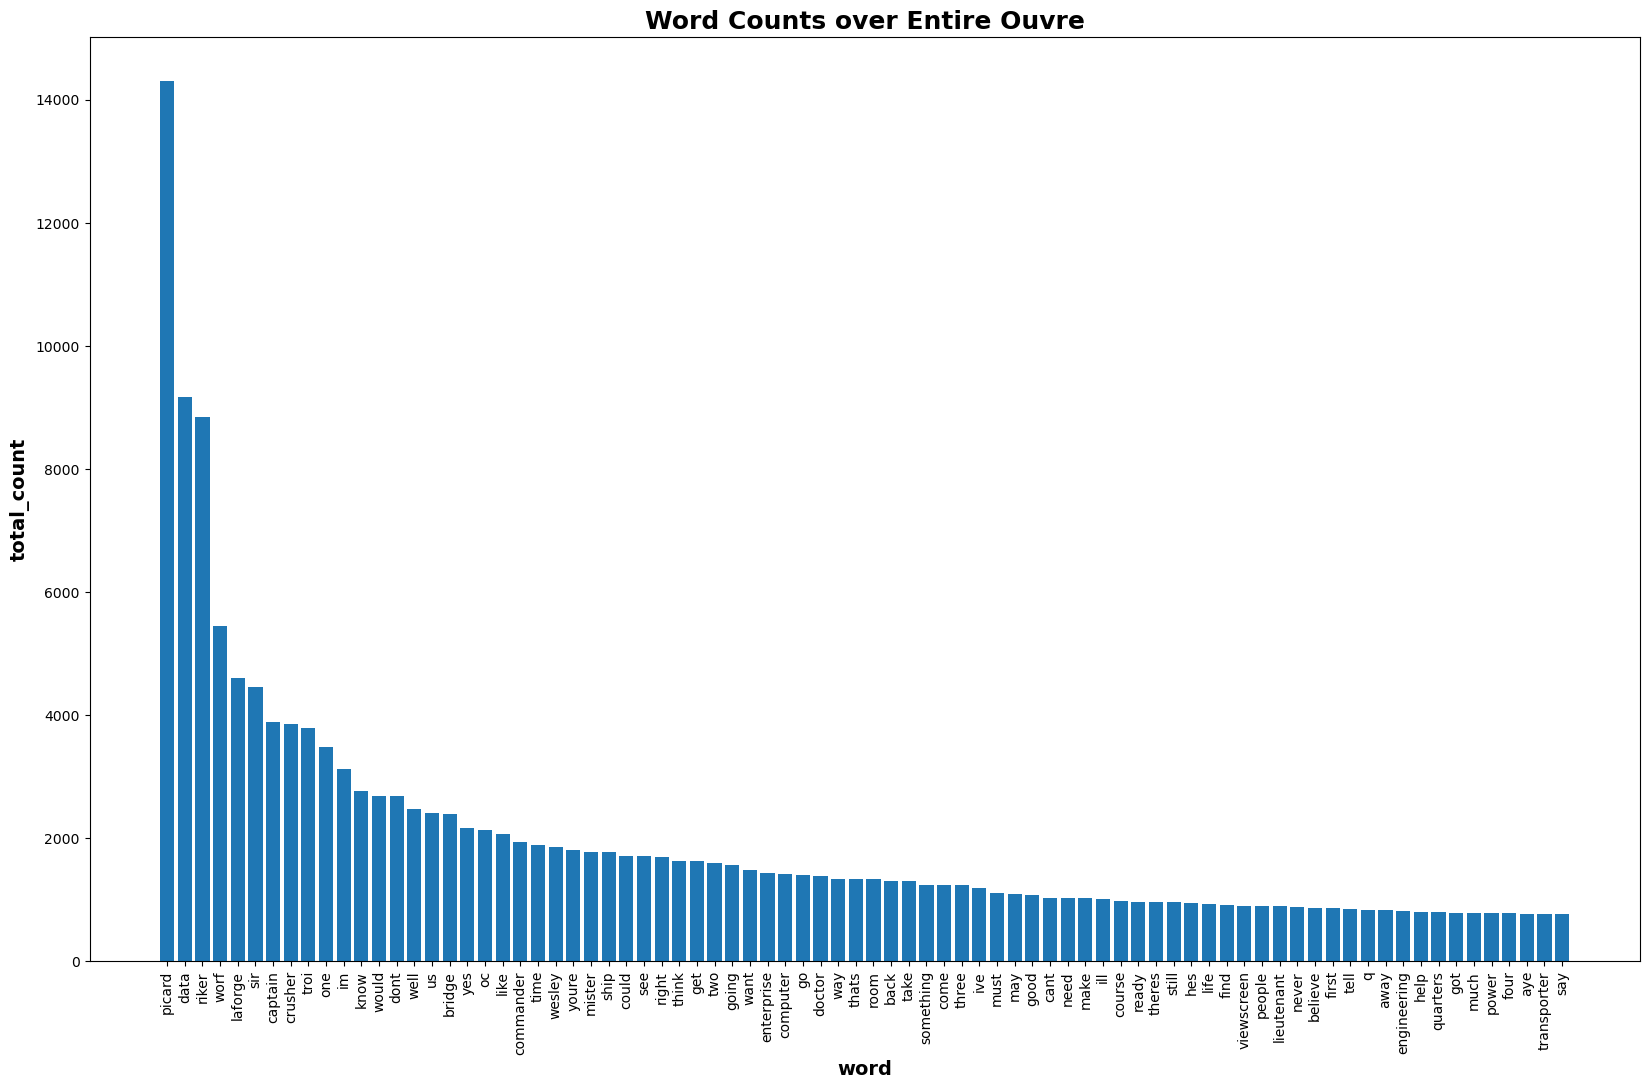

<Figure size 640x480 with 0 Axes>

In [78]:
# histogram of the word counts over the entire ouvre from largest to smallest or to some appropriate small number

min_wc_thres = 750 # plotting only those words that have a count greater than this threshold

    ## drop the first column

word_counts = df.drop(df.columns[0]).sum()
wc_series = word_counts.to_pandas().squeeze().sort_values(ascending=False)

wc_series = wc_series[wc_series > min_wc_thres]

    ## plot the histogram
plt.figure(figsize=(20, 12))
plt.bar(wc_series.index, wc_series.values)
plt.xlabel('word', fontweight="bold", fontsize=14)
plt.ylabel('total_count', fontweight="bold", fontsize=14)
plt.title('Word Counts over Entire Ouvre', fontweight="bold", fontsize=18)
plt.xticks(rotation=90)  # Rotate category labels if needed for readability
plt.show()

plt.savefig("category_sums_plot.png", format="png", dpi=300)

## (2b-c) Dimensionality Reduction

I have used 2 methods to reduce the dimension and visualize here. They are (i) PCA, and (ii) t-SNE

### PCA

In [149]:
import numpy as np

from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

import matplotlib.lines as mlines

In [ ]:
n_pcs = 2 # to display on a 2-D frame. Change accordingly as 2 PCs dont explain a lot of variance.
df_pca = df.drop(df.columns[0])

# Create a pipeline with scaling and PCA
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=n_pcs))  # Specify the number of components
])

# Fit and transform the data using the pipeline
pca_result = pipeline.fit_transform(df_pca)


In [ ]:
# color coding of each data point

    ## first find the character appeared most often for each episode
characters = ["picard", "riker", "data", "troi", "worf", "crusher"]
max_character = np.argmax(df[characters].to_numpy(), axis=1)

    ## map colors
character_colors = ['red', 'blue', 'green', 'purple', 'orange', 'brown']  # Colors for each character
episode_colors = [character_colors[i] for i in max_character]


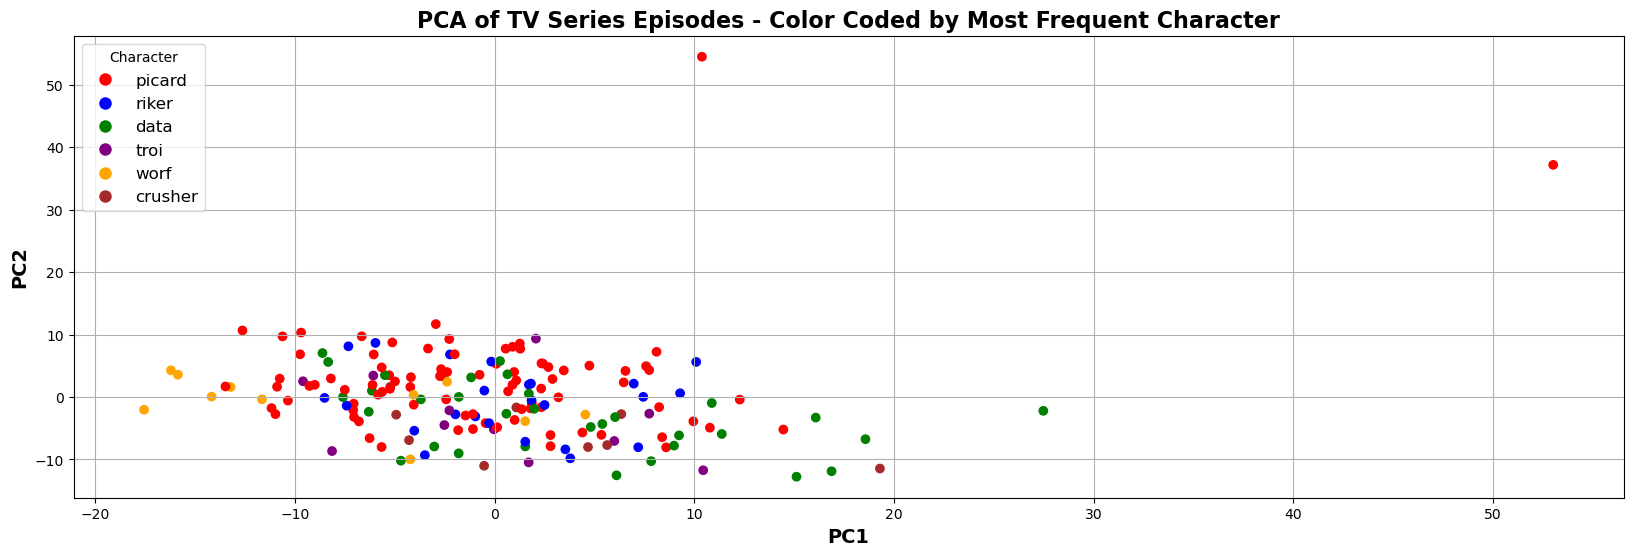

In [157]:
# Create the scatter plot
plt.figure(figsize=(20, 6))
scatter = plt.scatter(pca_result[:, 0], pca_result[:, 1], c=episode_colors)

# Add a legend with character labels
legend_labels = [mlines.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10, label=char)
                 for char, color in zip(characters, character_colors)]
plt.legend(handles=legend_labels, title="Character", fontsize=12)

plt.title('PCA of TV Series Episodes - Color Coded by Most Frequent Character', fontsize=16, fontweight='bold')
plt.xlabel('PC1', fontsize=14, fontweight='bold')
plt.ylabel('PC2', fontsize=14, fontweight='bold')
plt.grid(True)
plt.show()

plt.savefig("pca.png", format="png", dpi=300)

It is very hard to find any pattern just by looking at the figure above. This is probably becuase the first 2 PCs explain only a very small proportion of the variance of the data.

## (3) Clustering of the Data

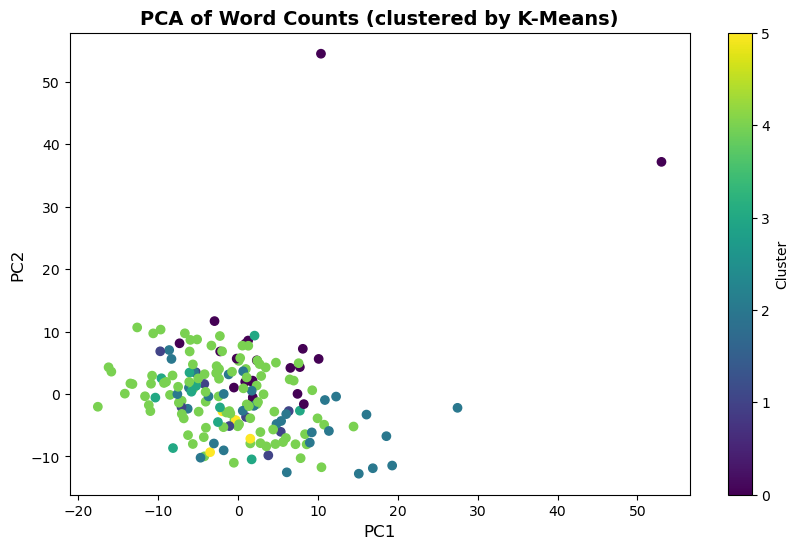

In [230]:
from sklearn.cluster import KMeans

## prepare data
X = df.drop('Episode URL')

## K-means clustering 
kmeans = KMeans(n_clusters=6, random_state=805)
kmeans.fit(X)

## get labels
clusters = kmeans.labels_

plt.figure(figsize=(10, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=clusters)
plt.title('PCA of Word Counts (clustered by K-Means)', fontsize=14, fontweight="bold")
plt.xlabel('PC1', fontsize=12)
plt.ylabel('PC2', fontsize=12)
plt.colorbar(label='Cluster')
plt.show()

As seen above, it's not easy to see a clear distinction between the clusters. Probably plotting them in a higher dimension would help us see more underlying patterns in the data.

## (5) Data Subsetting using Pandas

In [170]:
df_pd = pd.read_csv("episode_word_counts.csv")

print(f"This dataframe has {df_pd.shape[0]} rows")

This dataframe has 176 rows


In [188]:
## row sums for the numerical columns

row_sums = df_pd.iloc[:,1:].sum(1)
row_sums_filt = row_sums[row_sums > 100]
row_sums_filt

print(f"All rows have a total count of at least 100. That is, each episode speaks at least 100 word which makes sense.")

All rows have a total count of at least 100. That is, each episode speaks at least 100 word which makes sense.
